In [ ]:
#Generate Orders
import random

def generate_orders(num_orders=25):
    orders = []
    for i in range(1, num_orders + 1):
        arrival_time = random.randint(720, 750)  # 12:00–12:30 in minutes
        prep_time = random.randint(1, 7)         # 1–7 minutes
        orders.append({
            'id': i,
            'arrival_time': arrival_time,
            'prep_time': prep_time,
            'start_time': None,
            'end_time': None,
            'wait_time': None
        })
    return sorted(orders, key=lambda x: x['arrival_time'])

# Show sample generated orders
orders = generate_orders()
for o in orders:
    print(o)


{'id': 11, 'arrival_time': 721, 'prep_time': 1, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 18, 'arrival_time': 721, 'prep_time': 6, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 1, 'arrival_time': 724, 'prep_time': 6, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 9, 'arrival_time': 724, 'prep_time': 7, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 21, 'arrival_time': 725, 'prep_time': 5, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 23, 'arrival_time': 726, 'prep_time': 1, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 6, 'arrival_time': 727, 'prep_time': 3, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 20, 'arrival_time': 731, 'prep_time': 1, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 19, 'arrival_time': 735, 'prep_time': 7, 'start_time': None, 'end_time': None, 'wait_time': None}
{'id': 2, 'arrival_time': 736, 'prep_time': 1, 'start_time

In [ ]:
# Clock Simulation + FIFO Queue (First Come First Serve)

from collections import deque

def simulate_fifo(orders):
    current_time = 720  # Start at 12:00 PM
    end_time = 780      # Simulate until 1:00 PM (can be extended if needed)
    cook_busy_until = 0
    queue = deque()
    order_index = 0
    completed_orders = []

    while len(completed_orders) < len(orders):
        # Add new arrivals to queue
        while order_index < len(orders) and orders[order_index]['arrival_time'] == current_time:
            queue.append(orders[order_index])
            order_index += 1

        # If cook is free and queue is not empty, start next order
        if current_time >= cook_busy_until and queue:
            current_order = queue.popleft()
            current_order['start_time'] = current_time
            current_order['end_time'] = current_time + current_order['prep_time']
            current_order['wait_time'] = current_order['start_time'] - current_order['arrival_time']
            cook_busy_until = current_order['end_time']
            completed_orders.append(current_order)

        current_time += 1

    return completed_orders


In [ ]:
#Result Summary
def print_summary_results(strategy_name, completed_orders):
    total_wait = sum(order['wait_time'] for order in completed_orders)
    average_wait = total_wait / len(completed_orders)
    max_wait = max(order['wait_time'] for order in completed_orders)

    print(f"\n📌 Strategy: {strategy_name}")
    print(f"Total Wait Time: {total_wait} minutes")
    print(f"Average Wait Time: {average_wait:.2f} minutes")
    print(f"Max Wait Time: {max_wait} minutes")


In [ ]:
# Step 1: Generate Orders
orders = generate_orders()

# Step 2: Simulate FIFO
completed_orders_fifo = simulate_fifo(orders)

# Step 3: Show Result
print_summary_results("FIFO Queue", completed_orders_fifo)



📌 Strategy: FIFO Queue
Total Wait Time: 1124 minutes
Average Wait Time: 44.96 minutes
Max Wait Time: 88 minutes


In [ ]:
#Random Selection Strategy

def simulate_random_selection(orders):
    current_time = 720
    cook_busy_until = 0
    queue = []
    order_index = 0
    completed_orders = []

    while len(completed_orders) < len(orders):
        # Add newly arrived orders to queue
        while order_index < len(orders) and orders[order_index]['arrival_time'] == current_time:
            queue.append(orders[order_index])
            order_index += 1

        # If cook is free and queue is not empty
        if current_time >= cook_busy_until and queue:
            # Pick random order
            current_order = random.choice(queue)
            queue.remove(current_order)

            current_order['start_time'] = current_time
            current_order['end_time'] = current_time + current_order['prep_time']
            current_order['wait_time'] = current_order['start_time'] - current_order['arrival_time']
            cook_busy_until = current_order['end_time']

            completed_orders.append(current_order)

        current_time += 1

    return completed_orders


In [ ]:
#Compare With FIFO

# Re-generate same orders for fair comparison
orders_for_random = generate_orders()

# Simulate
completed_orders_random = simulate_random_selection(orders_for_random)

# Show result
print_summary_results("Random Selection", completed_orders_random)



📌 Strategy: Random Selection
Total Wait Time: 817 minutes
Average Wait Time: 32.68 minutes
Max Wait Time: 81 minutes


In [ ]:
#SJF Using Min-Heap

#Among all arrived orders in the queue, pick the one with the shortest prep time.
#Orders arriving later with short prep times can "cut the line", so we track fairness in the next step with aging.

In [ ]:
import heapq


In [ ]:
def simulate_sjf_min_heap(orders):
    current_time = 720
    cook_busy_until = 0
    heap = []
    order_index = 0
    completed_orders = []

    while len(completed_orders) < len(orders):
        # Add new arrivals to the heap (by prep_time, id)
        while order_index < len(orders) and orders[order_index]['arrival_time'] == current_time:
            order = orders[order_index]
            heapq.heappush(heap, (order['prep_time'], order['id'], order))
            order_index += 1

        # If cook is free and heap is not empty
        if current_time >= cook_busy_until and heap:
            _, _, current_order = heapq.heappop(heap)
            current_order['start_time'] = current_time
            current_order['end_time'] = current_time + current_order['prep_time']
            current_order['wait_time'] = current_order['start_time'] - current_order['arrival_time']
            cook_busy_until = current_order['end_time']
            completed_orders.append(current_order)

        current_time += 1

    return completed_orders



In [ ]:
orders_for_sjf = generate_orders()
completed_orders_sjf = simulate_sjf_min_heap(orders_for_sjf)
print_summary_results("SJF using Min-Heap", completed_orders_sjf)



📌 Strategy: SJF using Min-Heap
Total Wait Time: 348 minutes
Average Wait Time: 13.92 minutes
Max Wait Time: 65 minutes


In [ ]:
#Priority Queue with Aging

#SJF gives priority to small prep times. But what if a big order keeps getting ignored? Aging fixes that:
#Over time, even large prep-time orders gain “priority points” and eventually get served.

#priority = prep_time - aging_factor * (current_time - arrival_time)


In [ ]:
def simulate_priority_queue_with_aging(orders, aging_factor=0.1):
    current_time = 720
    cook_busy_until = 0
    waiting_orders = []
    order_index = 0
    completed_orders = []

    while len(completed_orders) < len(orders):
        # Add new arrivals to the waiting list
        while order_index < len(orders) and orders[order_index]['arrival_time'] == current_time:
            waiting_orders.append(orders[order_index])
            order_index += 1

        # If cook is free and orders are waiting
        if current_time >= cook_busy_until and waiting_orders:
            heap = []

            # Build heap with dynamic priority
            for order in waiting_orders:
                wait_time = current_time - order['arrival_time']
                priority_score = order['prep_time'] - aging_factor * wait_time
                heapq.heappush(heap, (priority_score, order['id'], order))

            # Pick the order with the lowest (adjusted) prep_time
            _, _, current_order = heapq.heappop(heap)
            waiting_orders.remove(current_order)

            current_order['start_time'] = current_time
            current_order['end_time'] = current_time + current_order['prep_time']
            current_order['wait_time'] = current_order['start_time'] - current_order['arrival_time']
            cook_busy_until = current_order['end_time']
            completed_orders.append(current_order)

        current_time += 1

    return completed_orders


In [ ]:
orders_for_aging = generate_orders()

completed_orders_aging = simulate_priority_queue_with_aging(orders_for_aging)

print_summary_results("Priority Queue with Aging", completed_orders_aging)



📌 Strategy: Priority Queue with Aging
Total Wait Time: 755 minutes
Average Wait Time: 30.20 minutes
Max Wait Time: 81 minutes


In [ ]:
#visualize wait time comparison

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_wait_time_comparison(results):
    strategies = list(results.keys())
    avg_waits = [result['average'] for result in results.values()]
    max_waits = [result['max'] for result in results.values()]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(strategies, avg_waits, color=['skyblue', 'orange', 'lightgreen', 'violet'])

    # Add value labels on top of bars
    for bar, val in zip(bars, avg_waits):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.2f}', ha='center', fontsize=10)

    plt.title("📊 Average Wait Time Comparison by Strategy")
    plt.xlabel("Order Handling Strategy")
    plt.ylabel("Average Wait Time (minutes)")
    plt.ylim(0, max(avg_waits) + 2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
# Generate fresh orders for each strategy (or same set if preferred)
results = {}

# Random
orders_random = generate_orders()
completed_random = simulate_random_selection(orders_random)
results["Random"] = {
    'average': sum(o['wait_time'] for o in completed_random) / len(completed_random),
    'max': max(o['wait_time'] for o in completed_random)
}

# FIFO
orders_fifo = generate_orders()
completed_fifo = simulate_fifo(orders_fifo)
results["FIFO"] = {
    'average': sum(o['wait_time'] for o in completed_fifo) / len(completed_fifo),
    'max': max(o['wait_time'] for o in completed_fifo)
}

# SJF
orders_sjf = generate_orders()
completed_sjf = simulate_sjf_min_heap(orders_sjf)
results["SJF (Min-Heap)"] = {
    'average': sum(o['wait_time'] for o in completed_sjf) / len(completed_sjf),
    'max': max(o['wait_time'] for o in completed_sjf)
}

# Aging Priority Queue
orders_aging = generate_orders()
completed_aging = simulate_priority_queue_with_aging(orders_aging)
results["Aging Priority Queue"] = {
    'average': sum(o['wait_time'] for o in completed_aging) / len(completed_aging),
    'max': max(o['wait_time'] for o in completed_aging)
}


/tmp/ipython-input-16-538421342.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


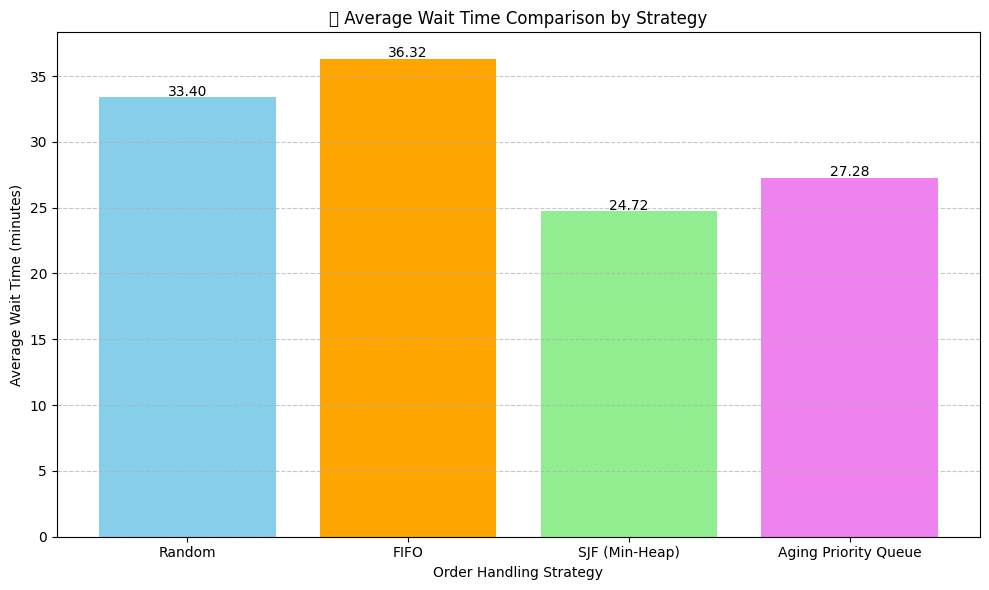

In [ ]:
plot_wait_time_comparison(results)


In [ ]:
#Add predictive modeling (based on historical orders)
#Use historical order data to predict prep time or expected wait time based on:
#Time of day,Arrival pattern and Past order trends

In [ ]:
#Simulate or Collect Historical Data
import pandas as pd

def generate_historical_data(num_days=10, orders_per_day=25):
    data = []
    for day in range(1, num_days + 1):
        for order_id in range(1, orders_per_day + 1):
            arrival_time = random.randint(720, 750)
            prep_time = random.randint(1, 7)
            data.append({
                'day': day,
                'arrival_time': arrival_time,
                'prep_time': prep_time
            })
    return pd.DataFrame(data)


In [ ]:
# Generate 10 days of historical data
historical_df = generate_historical_data()
historical_df.head()


,day,arrival_time,prep_time
0,1,743,2
1,1,732,1
2,1,729,4
3,1,742,5
4,1,750,6


In [ ]:
# Build a Simple Predictive Model
#predict prep_time based on arrival_time using linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def build_prep_time_model(df):
    X = df[['arrival_time']]
    y = df['prep_time']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    return model


In [ ]:
#Use the Model to Predict Prep Times (apply it to new order arrivals)
def predict_prep_times(model, orders_df):
    X_new = pd.DataFrame({'arrival_time': [order['arrival_time'] for order in orders_df]})
    predicted_prep_times = model.predict(X_new)

    for i, order in enumerate(orders_df):
        order['predicted_prep_time'] = predicted_prep_times[i]

    return orders_df


In [ ]:
# Generate historical data
historical_df = generate_historical_data()

# Train the model
model = build_prep_time_model(historical_df)

# Generate new orders
new_orders = generate_orders()

# Predict prep times
predicted_orders = predict_prep_times(model, new_orders)

# Show predictions
for order in predicted_orders:
    print(f"Arrival: {order['arrival_time']} | Predicted Prep Time: {order['predicted_prep_time']:.2f}")


Arrival: 722 | Predicted Prep Time: 3.92
Arrival: 723 | Predicted Prep Time: 3.92
Arrival: 724 | Predicted Prep Time: 3.92
Arrival: 724 | Predicted Prep Time: 3.92
Arrival: 724 | Predicted Prep Time: 3.92
Arrival: 725 | Predicted Prep Time: 3.91
Arrival: 725 | Predicted Prep Time: 3.91
Arrival: 725 | Predicted Prep Time: 3.91
Arrival: 726 | Predicted Prep Time: 3.91
Arrival: 727 | Predicted Prep Time: 3.91
Arrival: 727 | Predicted Prep Time: 3.91
Arrival: 728 | Predicted Prep Time: 3.91
Arrival: 728 | Predicted Prep Time: 3.91
Arrival: 729 | Predicted Prep Time: 3.90
Arrival: 731 | Predicted Prep Time: 3.90
Arrival: 731 | Predicted Prep Time: 3.90
Arrival: 731 | Predicted Prep Time: 3.90
Arrival: 737 | Predicted Prep Time: 3.88
Arrival: 740 | Predicted Prep Time: 3.88
Arrival: 741 | Predicted Prep Time: 3.87
Arrival: 743 | Predicted Prep Time: 3.87
Arrival: 744 | Predicted Prep Time: 3.87
Arrival: 746 | Predicted Prep Time: 3.86
Arrival: 746 | Predicted Prep Time: 3.86
Arrival: 747 | P

In [ ]:
#Show the Best Order Selection Strategy

In [ ]:
def plot_metric_comparison(results, metric='average', title='Average Wait Time'):
    strategies = list(results.keys())
    values = [result[metric] for result in results.values()]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(strategies, values, color='teal')

    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.2f}', ha='center', fontsize=10)

    plt.title(f"📊 {title} by Strategy")
    plt.ylabel("Minutes")
    plt.ylim(0, max(values) + 2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-30-2627155741.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


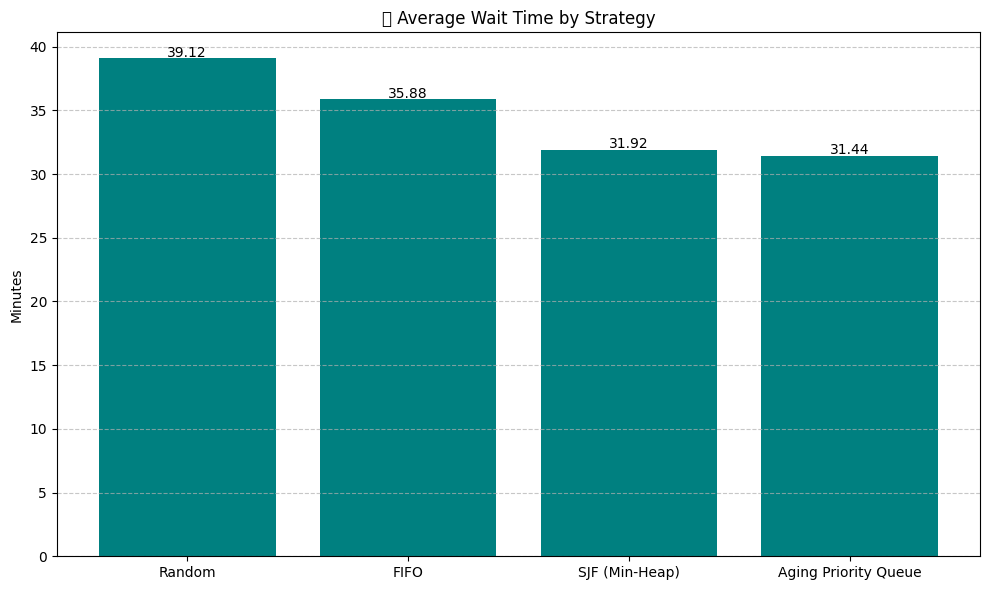

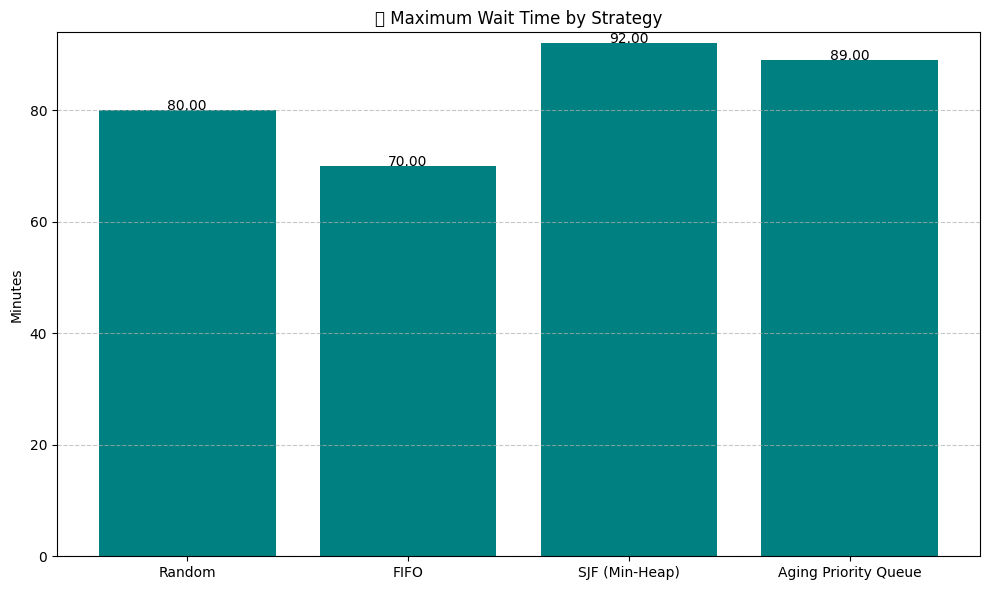

In [ ]:
plot_metric_comparison(results, metric='average', title='Average Wait Time')
plot_metric_comparison(results, metric='max', title='Maximum Wait Time')


In [ ]:
#Final Recommendation
#Based on our simulation of 25 random orders using four different strategies, we observed that the Shortest Job First (Min-Heap) algorithm had the lowest average wait time.
#However, it risks unfair delays for long orders. By introducing an aging mechanism, the Priority Queue with Aging strategy offered a better balance between performance and fairness, making it the most practical and scalable solution for real university canteens.